# TEXT MINING for PRACTICE
- 본 자료는 텍스트 마이닝을 활용한 연구 및 강의를 위한 목적으로 제작되었습니다.
- 본 자료를 강의 목적으로 활용하고자 하시는 경우 꼭 아래 메일주소로 연락주세요.
- 본 자료에 대한 허가되지 않은 배포를 금지합니다.
- 강의, 저작권, 출판, 특허, 공동저자에 관련해서는 문의 바랍니다.
- **Contact : 전병진(fingeredman@gmail.com)**

---

## WEEK 06-2. 단어 가중치를 활용해 워드클라우드 생성하기
- Python으로 문서에서 단어의 가중치를 활용해 워드클라우드를 생성하는 방법에 대해 다룹니다.

---

In [1]:
from teanaps.nlp.SyntaxAnalyzer import SyntaxAnalyzer

sa = SyntaxAnalyzer()

tokenized_sentence_list = []

PATH = "data/article_sample.txt"
POS_LIST = ["NNG", "NNP"]

f = open(PATH, encoding="utf-8")

for line in f:
    line = line.strip()
    col = line.split("\t")
    label = col[0]
    source = col[1]
    datetime = col[2]
    title = col[3]
    content = col[4]
    tagged_word_list = sa.parse(content)
    tokenized_sentence = ""
    for word, pos in tagged_word_list:
        if pos in POS_LIST:
            tokenized_sentence += " " + word
    tokenized_sentence_list.append(tokenized_sentence.strip())
f.close()

tokenized_sentence_list[:5]

['금융 硏 비트코인 쇠락 내재 결함 보고서 지디 넷 코리아 손 예술 기자 대표 암호 화폐 비트코인 가격 급 변동 일부 암호 화폐 옹호 비트코인 결함 해소 국면 예측 결함 전제 국내외 정부 감독 당국 선제 시각 규제 환경 정비 주장 한국 금융 연구원 비트코인 쇠락 내재 결함 보고서 암호 화폐 옹호 입장 제시 결함 발표 암호 화폐 옹호 암호 화폐 가치 사업 모델 등장 가능 집중 인물 통칭 비트코인 결함 우선 해소 비트코인 재화 용역 구입 사용 시장 미국 비트코인 시장 조사 기관 사토시 캐피탈 리서치 기준 비트코인 사용 거래 결제 액 중국 알리 페이 위 챗 페이 거래 결제 액 감안 시장 비트코인 거래 건수 급증 블록 용량 제한 채굴 통 결제 처리 지연 이용자 거래 완료 부담 수료 문제 비트코인 기반 기술 블록체인 구성 블록 용량 초당 평균 거래 처리 건수 블록 형성 반면 비자 경우 초당 거래 처리 건수 거래소 해킹 사기 거래 노출 점 캐나다 암호 화폐 거래소 쿼드리 대표 이사 설립자 사망 거액 고객 암호 화폐 분시 파산 보호 신청 파산 관재인 비밀 관리 설립자 사망 이전 간 핫 월 렛 고객 암호 화폐 발표 월 렛 인터넷 연결 암호 화폐 전자지갑 결함 비트코인 이용 오프라인 결제 나라 디지털 화폐 실험 시도 상태 암호 화폐 비트코인 법정 통화 보완 지급 결제 가치 저장 수단 역할 가늠 내재 결함 대처 국내외 정부 감독 당국 암호 화폐 시각 규제 환경 정비 필요 보고서 의견 옹호 지적 결함 일부 금융 소비자 투자 보호 문제 직결 상황 한국 금융 연구원 암호 화폐 수용 검토 정부 감독 당국 소비자 보호 강화 금융 시장 안정 확보 관점 시장 참가자 정보 공시 의무 강화 결제 계좌 전자지갑 제공 거래소 금융 사 자본금 유동 규제 부과 밖 자금 세탁 차단 집중 검토 필요 서술 한편 비트코인 중순 육박 올해 기간 동안 비트코인 시가총액 감소 손 예술 기자',
 '비트코인 상반 평가 김산하 기자 니얼 퍼거슨 하버드대 교수 왼쪽 워렌 버핏 버크셔 해서웨이 회장 오른쪽 사진 트위터

In [2]:
# wordcloud 패키지를 불러옵니다.
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [3]:
# 추출한 단어 리스트를 활용해 명사만으로 이루어진 문자열을 생성합니다.
noun_string = ""

# 명사를 띄어쓰기 구분자로 붙혀줍니다.
for tokenized_sentence in tokenized_sentence_list:
    # wordcloud 패키지는 연속되는 단어를 하나로 인식합니다.
    # 단어를 섞어 단어단위로 워드클라우드가 생성될 수 있도록 합니다.
    # random 패키지의 shuffle(LIST) 함수는 리스트의 순서를 랜덤으로 섞어줍니다.
    import random
    tag_sentence = tokenized_sentence.split(" ")
    random.shuffle(tag_sentence)
    for word in tag_sentence:
        noun_string += word + " "

# 마지막에 붙은 띄어쓰기를 제거합니다.
noun_string = noun_string.strip()

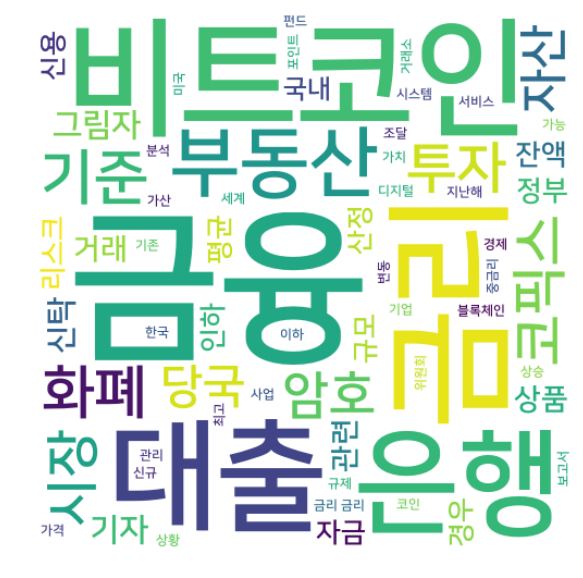

In [4]:
# 워드클라우드를 생성하고 파일로 저장합니다.

# 워드클라우드 옵션을 선택합니다.
font_path="data/NanumSquareB.otf"  #폰트
background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=10              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()